## Data Visualization

In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
# Reading In Data
df = pd.read_excel('cleaned_Validated Data DePauly.xlsx')

df = df[['programreportid', 'programdescription', 'impactarea', 'genome', 'outcome', 'outcomeid']]
df['programreportid'] = df['programreportid'].astype('category')
df['outcomeid'] = df['outcomeid'].astype('category')

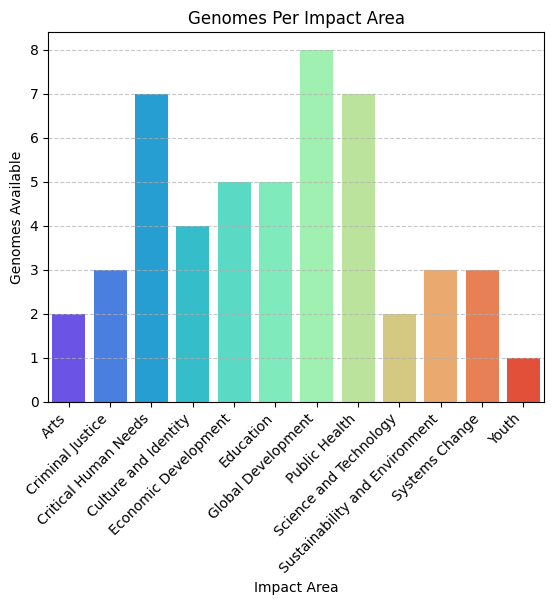

In [3]:
genomes_avail = df.groupby('impactarea')['genome'].nunique().reset_index(name="numgenomes")
genomes_avail = genomes_avail.sort_values(by="impactarea", ascending=True)

sns.barplot(data=genomes_avail, x="impactarea", y="numgenomes", hue="impactarea", palette="rainbow")
plt.xlabel("Impact Area")
plt.ylabel("Genomes Available")
plt.title("Genomes Per Impact Area")
plt.xticks(rotation=45, ha="right")  
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


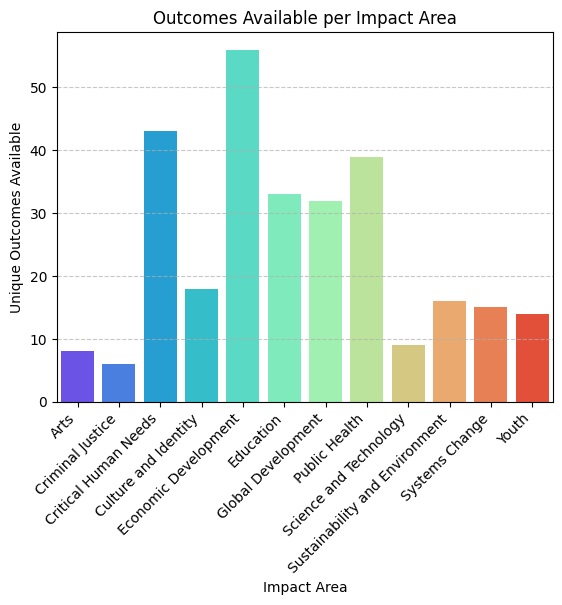

In [4]:
# num outcomeids available

genomes_avail = df.groupby('impactarea')['outcomeid'].nunique().reset_index(name="numoutcomes")
genomes_avail = genomes_avail.sort_values(by="impactarea", ascending=True)
sns.barplot(data=genomes_avail, x="impactarea", y="numoutcomes", hue="impactarea", palette="rainbow")
plt.xlabel("Impact Area")
plt.ylabel("Unique Outcomes Available")
plt.title("Outcomes Available per Impact Area")
plt.xticks(rotation=45, ha="right")  
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

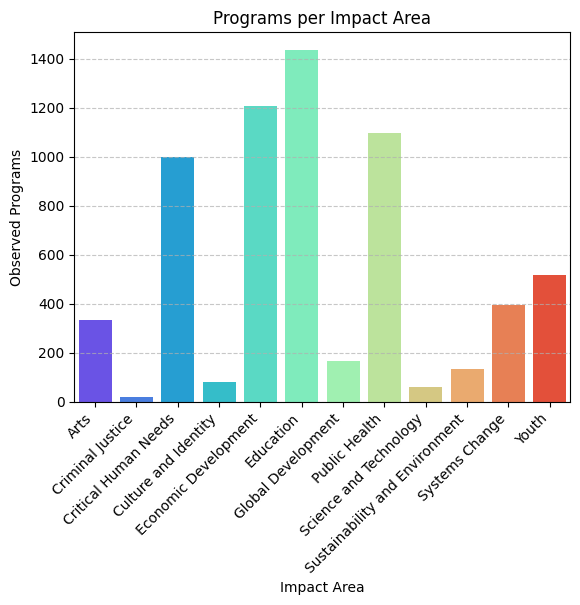

In [5]:
# num obs per impact area
impact_counts = df.groupby('impactarea')['genome'].size().reset_index(name="n")
impcat_counts = impact_counts.sort_values(by="impactarea", ascending=True)
sns.barplot(data=impact_counts, x="impactarea", y="n", hue="impactarea", palette="rainbow")
plt.xlabel("Impact Area")
plt.ylabel("Observed Programs")
plt.title("Programs per Impact Area")
plt.xticks(rotation=45, ha="right") 
plt.grid(axis="y", linestyle="--", alpha=0.7)

C:\Users\julia\AppData\Local\Temp\ipykernel_9220\1769278301.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_counts = df.groupby(['outcomeid', 'impactarea', 'genome']).size().reset_index(name="Count")


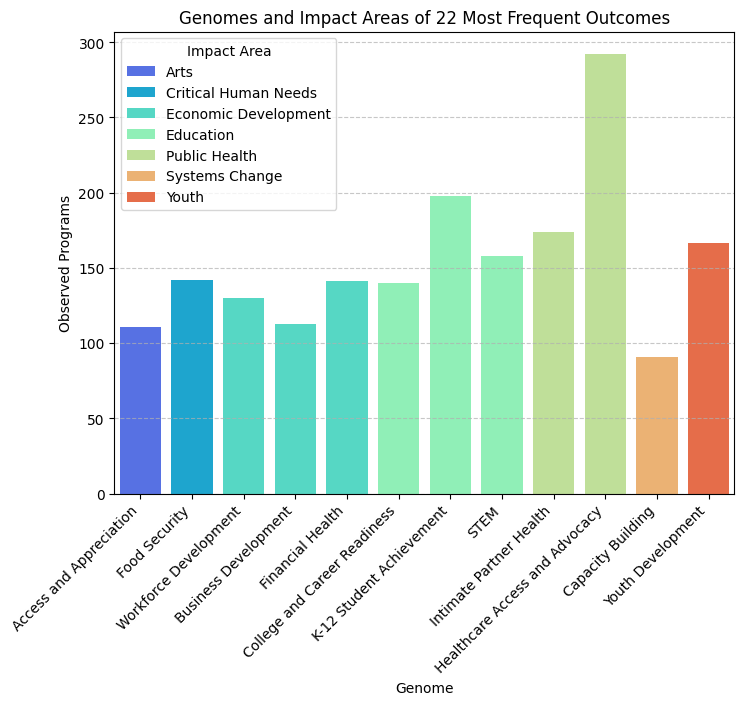

In [6]:
# 22 most common programs (n), their genomes(y), and the impact area (color)
outcome_counts = df.groupby(['outcomeid', 'impactarea', 'genome']).size().reset_index(name="Count")

outcome_counts = outcome_counts.sort_values(by="Count", ascending=False).head(22)

outcome_counts = outcome_counts.sort_values(by="impactarea", ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(data=outcome_counts, x="genome", y="Count", hue="impactarea", palette="rainbow", errorbar=None)
plt.xlabel("Genome")
plt.ylabel("Observed Programs")
plt.title("Genomes and Impact Areas of 22 Most Frequent Outcomes")
plt.xticks(rotation=45, ha="right")  
plt.legend(title="Impact Area")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

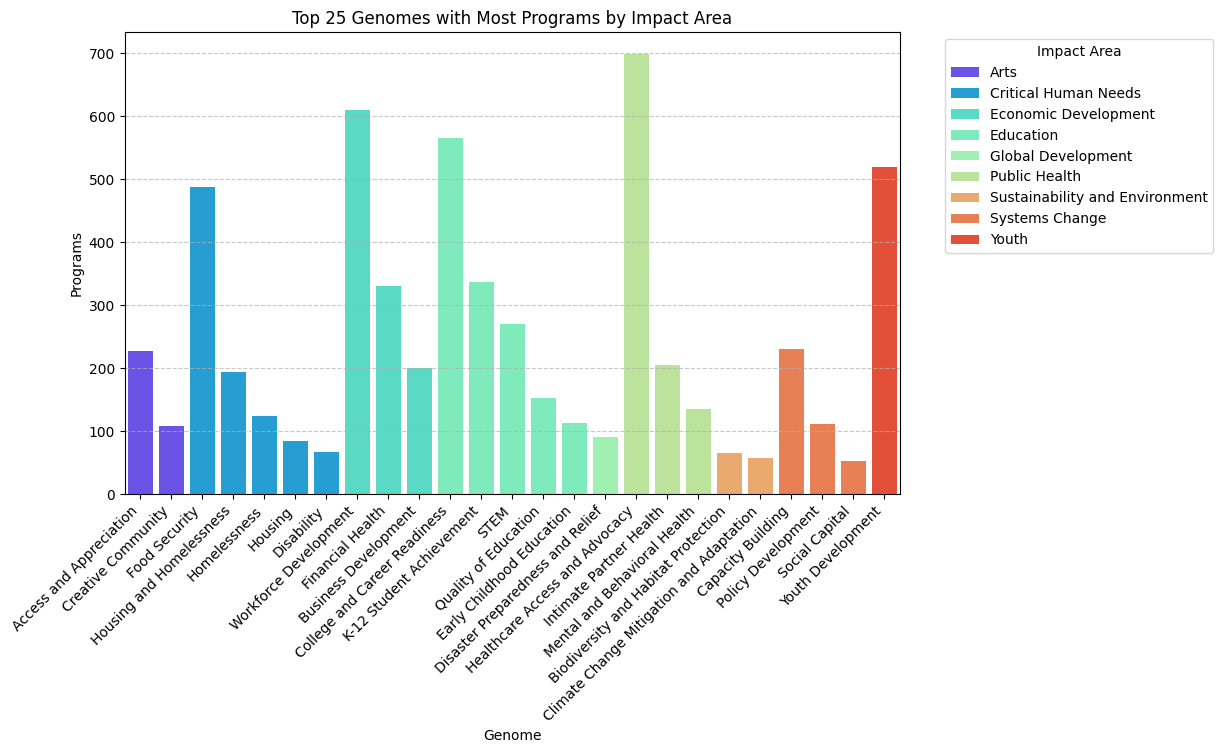

In [7]:
# which are our most frequently assigned outcomes?

# colormap
unique_impactareas = sorted(df['impactarea'].unique())
color_palette = sns.color_palette("rainbow", n_colors=len(unique_impactareas))
iacm = dict(zip(unique_impactareas, color_palette))

df_summary = df.groupby(["impactarea", "genome"]).size().reset_index(name="n")
df_summary = df_summary.sort_values(by="n", ascending=False)

top_10_df = df_summary.head(10)
top_10_df_sortn = top_10_df.sort_values(by="n", ascending=True)
top_20_df = df_summary.head(25)
top_20_df_sort = top_20_df.sort_values(by=["impactarea", "n"], ascending=[True, False])

plt.figure(figsize = (10, 6))
sns.barplot(data=top_20_df_sort, x="genome", y="n", hue="impactarea", palette=iacm)
plt.xlabel("Genome")
plt.ylabel("Programs")
plt.title("Top 25 Genomes with Most Programs by Impact Area")
plt.xticks(rotation=45, ha="right") 
plt.legend(title="Impact Area", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


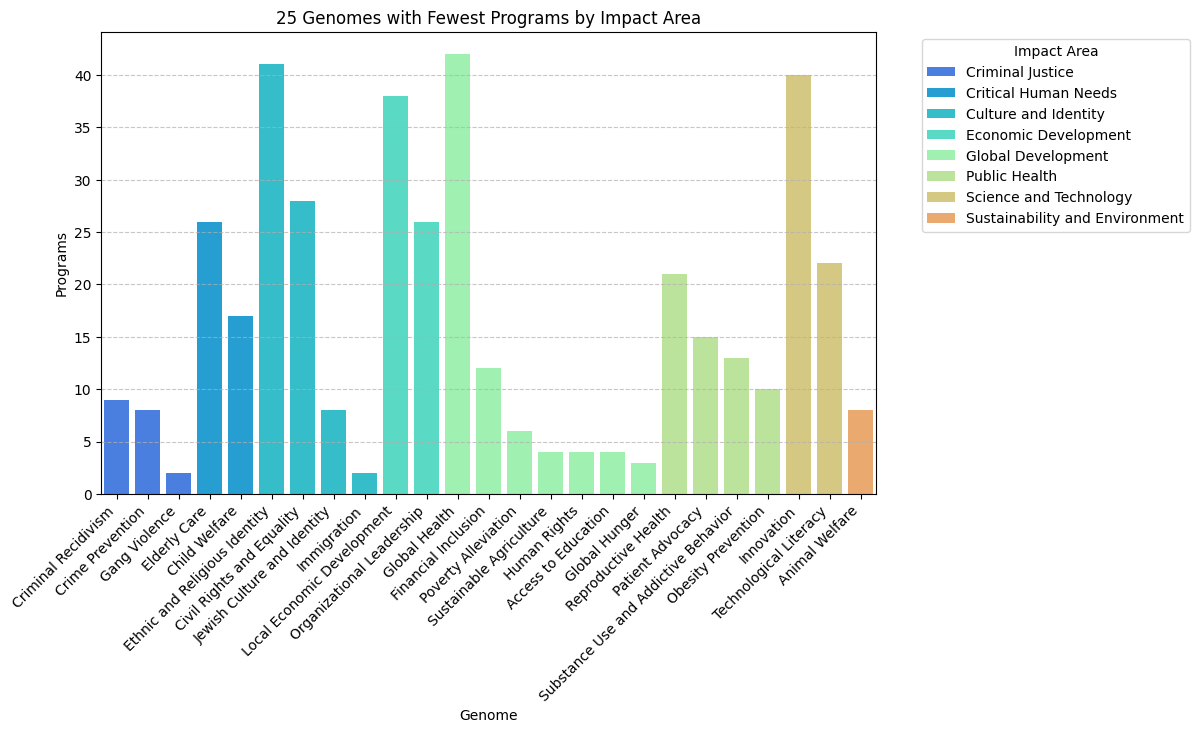

In [8]:
# distribution of observations in less common impact areas
df_summary = df.groupby(["impactarea", "genome"]).size().reset_index(name="n")
df_summary = df_summary.sort_values(by="n", ascending=True)

top_10_df = df_summary.head(10)
top_10_df_sortn = top_10_df.sort_values(by="n", ascending=True)
top_20_df = df_summary.head(25)
top_20_df_sort = top_20_df.sort_values(by=["impactarea", "n"], ascending=[True, False])

plt.figure(figsize = (10, 6))
sns.barplot(data=top_20_df_sort, x="genome", y="n", hue="impactarea", palette=iacm)
plt.xlabel("Genome")
plt.ylabel("Programs")
plt.title("25 Genomes with Fewest Programs by Impact Area")
plt.xticks(rotation=45, ha="right")  
plt.legend(title="Impact Area", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
#plt.tight_layout()
plt.show()
